In [1]:
import sys
sys.path.append("..")

import pickle

from src.environments import *
from src.agents import *
from src.agent_utils import *

#### We first define a random exploration strategy - we want the sequence of actions to be the same for each estimate, so we can easily compare

In [2]:
def define_exploration_tactic(env, n_each_bandit = 40, n_each_room = 8):
    '''
    This function spits out a list of actions 
    that focuses only on exploring the environment

    The action list will explore each action the same number of times in each state
    '''

    num_rooms = env.num_rooms
    actions   = env._actions

    action_list = []
    
    for i in range(num_rooms-1):
        for a in actions[:-2]:
            action_list.extend([a]*n_each_bandit)
        action_list.append(int(actions[-1]))
    
    # Now we reached final room
    for a in actions[:-2]:
        action_list.extend([a]*n_each_bandit)
    
    for i in range(n_each_room):
        action_list.extend([int(actions[-2])]*3)
        action_list.extend([int(actions[-1])]*3)
    
    return action_list

def define_random_exploration_tactic(env, lenght = 500):

    actions = env._actions
    return np.random.choice(actions, size = lenght)

## First we test on the LET environment with 3 rooms and 1 bandit, so that it is easy to plot

In [2]:
env = CorridorMAB.default(num_rooms    = 3,
                          num_bandits  = 1,
                          reward_distrib_params = [[-1,1], [-2,1], [3,1]],
                          move_penalty = -5)

In [4]:
#with open('good_action_list3.pkl', 'wb') as f:
#    pickle.dump(exploration_tactic, f)

In [5]:
len_episode = 300
new_tactic  = False

if new_tactic is True:
    exploration_tactic = define_random_exploration_tactic(env, len_episode)
else:
    with open('good_action_list3.pkl', 'rb') as f:
        exploration_tactic = pickle.load(f)

spl = SimplePlotter('test_vars13',
                    env,
                    BayesianAgent.default(decision_making_method = 'from_list',
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'EUB', 
                                          gamma =  0.98,
                                          action_list = exploration_tactic), 
                    BayesianAgent.default(decision_making_method = 'from_list',
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'EUDV', 
                                          gamma =  0.98,
                                          action_list = exploration_tactic),
                    BayesianAgent.default(decision_making_method = 'from_list',
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'UBE', 
                                          gamma =  0.98,
                                          action_list = exploration_tactic),
                    BayesianAgent.default(decision_making_method = 'from_list',
                                          Q_method = 'monte_carlo',
                                          Q_method_params = 100,
                                          name = 'monte_carlo', 
                                          gamma =  0.98,
                                          action_list = exploration_tactic))

spl.run_experiments(len_episode, 5, fair_comparison = True)

100%|██████████| 300/300 [00:18<00:00, 16.19it/s]


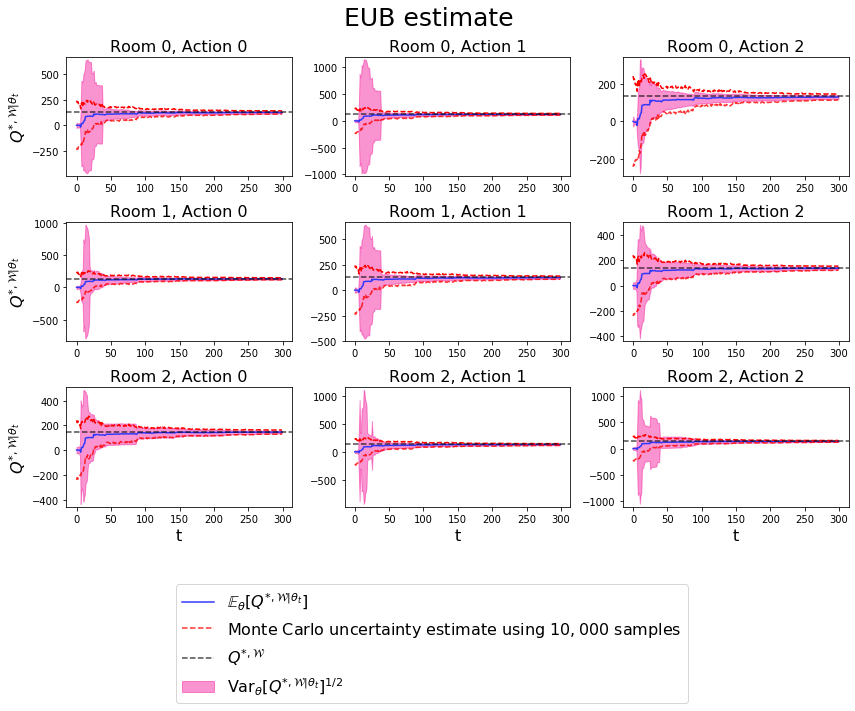

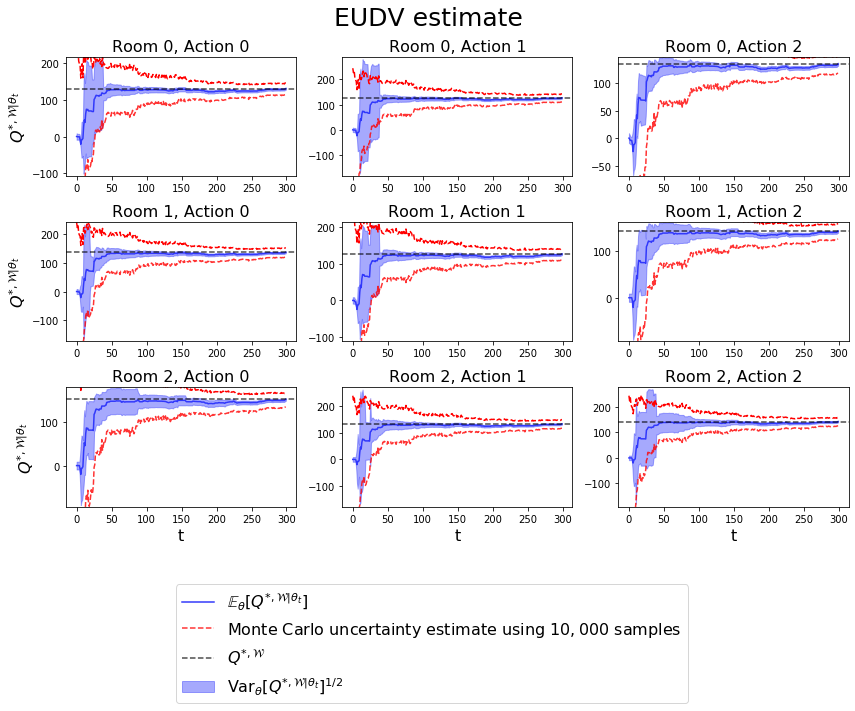

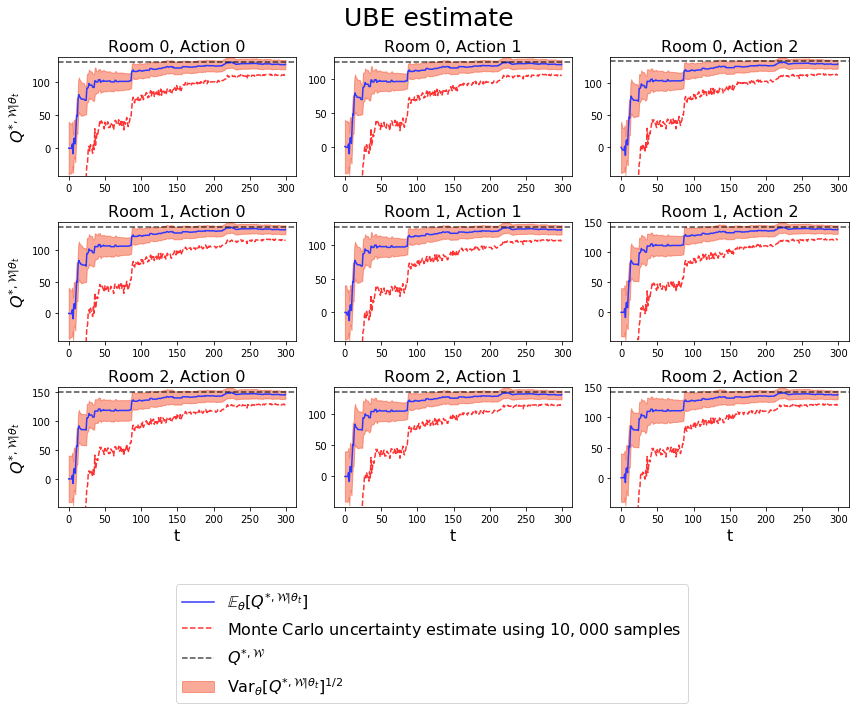

In [6]:
figs_compare = spl.plot_Q_u_comparison(figsize = (12,10))

In [7]:
spl.UBE.mean_step_time.mean(), spl.EUDV.mean_step_time.mean(), spl.EUB.mean_step_time.mean(), spl.monte_carlo.mean_step_time.mean()

(0.0036378649075826013,
 0.0037035635312398277,
 0.008825370947519938,
 0.06295084905624389)

### Tight prior 

In [5]:
len_episode = 1000

reward_distrib = {'mu': 0,
                  'lambda': 1,
                  'alpha': 2,
                  'beta': 2,
}

dyna_params    = 1

spl = SimplePlotter('test_vars15',
                    env,
                    BayesianAgent.default(decision_making_method = 'from_list',
                                          Q_method = 'predictive',
                                          u_method = 'EUB',
                                          name = 'EUB', 
                                          gamma =  0.98,
                                          reward_distrib = reward_distrib,
                                          dyna_params = dyna_params), 
                    BayesianAgent.default(decision_making_method = 'from_list',
                                          Q_method = 'predictive',
                                          u_method = 'predictive',
                                          name = 'EUDV', 
                                          gamma =  0.98,
                                          reward_distrib = reward_distrib,
                                          dyna_params = dyna_params),
                    BayesianAgent.default(decision_making_method = 'from_list',
                                          Q_method = 'predictive',
                                          u_method = 'UBE',
                                          name = 'UBE', 
                                          gamma =  0.98,
                                          reward_distrib = reward_distrib,
                                          dyna_params = dyna_params),
                    BayesianAgent.default(decision_making_method = 'from_list',
                                          Q_method = 'monte_carlo',
                                          Q_method_params = 100,
                                          name = 'monte_carlo', 
                                          gamma =  0.98,
                                          reward_distrib = reward_distrib,
                                          dyna_params = dyna_params))

spl.run_experiments(len_episode, 2, fair_comparison = True)

100%|██████████| 1000/1000 [00:58<00:00, 17.24it/s]


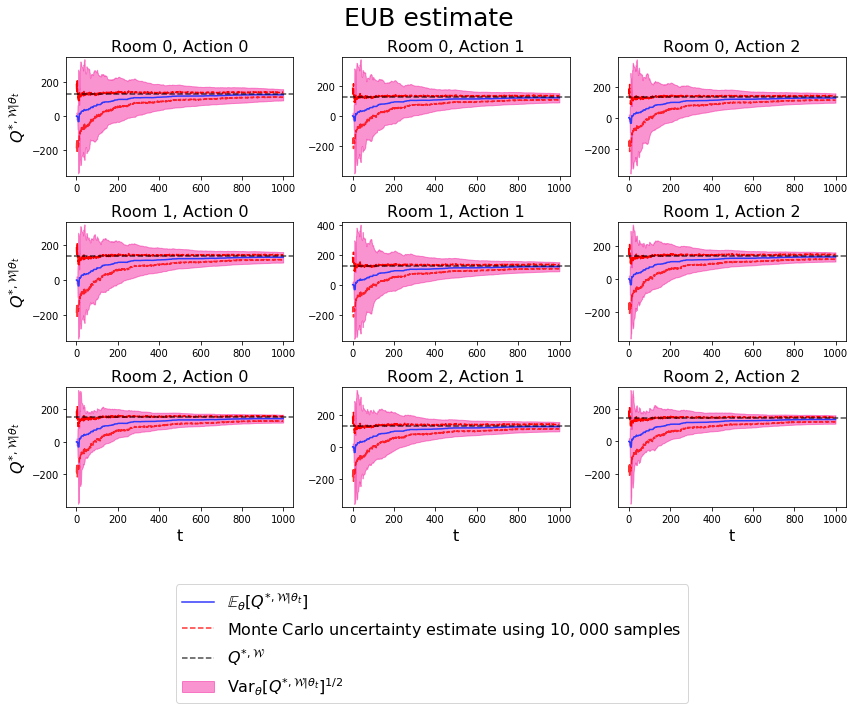

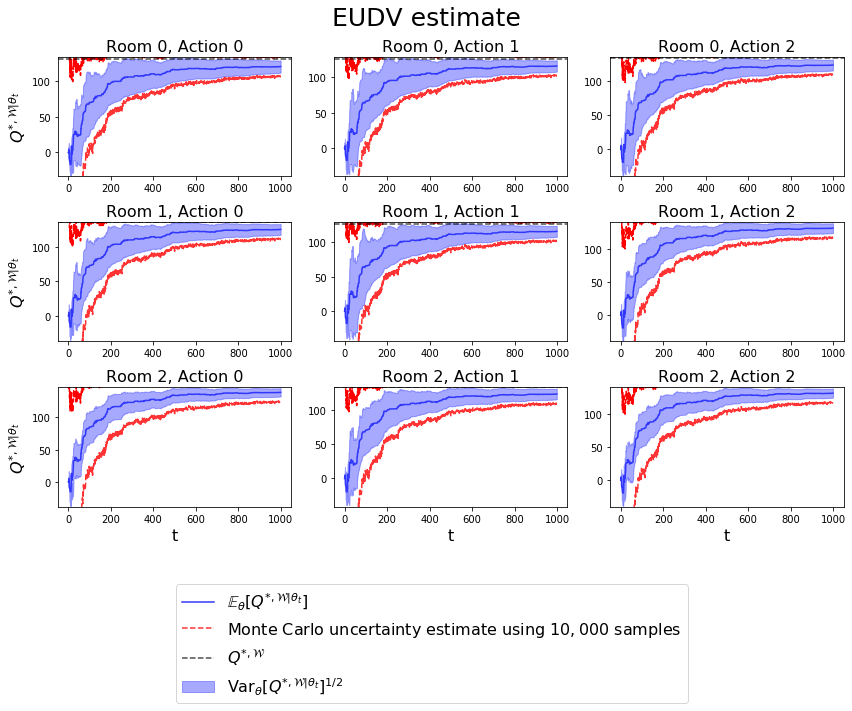

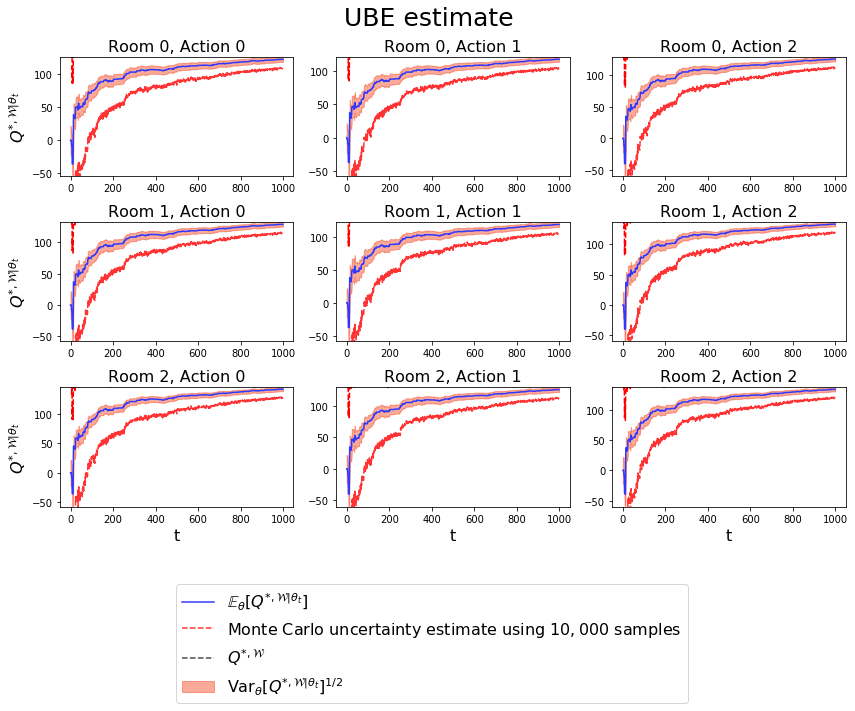

In [6]:
figs_compare = spl.plot_Q_u_comparison(figsize = (12,10))